# LAB06 Assigment




### Exercise 1 Linear Discriminant Analysis from Scratch using numpy (50 points )
- <font size=4> Complete the missing code in the LDA class below<font>

In [52]:
import numpy as np
import matplotlib.pyplot as plt


class LDA:
    #n_components:Number of components (<= min(n_classes - 1, n_features)) for dimensionality reduction.
    def __init__(self, n_components=None,reg_param=1e-3):
        
        self.n_components = n_components
        self.eigenvalues = None
        self.eigenvectors = None
        self.reg_param = reg_param  # Regularization parameter

    # def fit(self, X, y):
    #     if self.n_components is None or self.n_components > X.shape[1]:
    #         n_components = X.shape[1]
    #     else:
    #         n_components = self.n_components
       
    #     n_features = np.shape(X)[1] # n_features is the number of features in the dataset
    #     labels = np.unique(y)
  
    #     # Within class scatter matrix
    #     # Complete code for calculating S_W
    #     ########### Write Your Code Here ###########
    #     S_W = np.zeros((n_features, n_features))
    #     u_k = {}
    #     for k in labels:
    #         u_k[k] = np.mean(X[y==k], axis=0)
    #         S_W += np.dot((X[y==k]-u_k[k]).T, (X[y==k]-u_k[k]))
            
    #     # Between class scatter matrix
    #     # Complete code for calculating S_B
    #     ########### Write Your Code Here ##########
    #     u = np.mean(X, axis=0)
    #     S_B = np.zeros((n_features, n_features))
    #     for k in labels:
    #         S_B += np.dot((u_k[k]-u).reshape(-1,1), (u_k[k]-u).reshape(1,-1))
            
    #     # Determine SW^-1 * SB by calculating inverse of SW
    #     ########### Write Your Code Here ###########
    #     SW_inv_SB = np.dot(np.linalg.inv(S_W), S_B)
    #     # Get eigenvalues and eigenvectors of SW^-1 * SB
    #     ########### Write Your Code Here ###########
    #     eigenvalues, eigenvectors = np.linalg.eig(SW_inv_SB)
        
    #     # Sort the eigenvalues and corresponding eigenvectors from largest
    #     # to smallest eigenvalue and select the first n_components
    #     idx = eigenvalues.argsort()[::-1]
    #     eigenvalues = eigenvalues[idx][:n_components]
    #     eigenvectors = eigenvectors[:, idx][:, :n_components]
  
    #     self.eigenvalues = eigenvalues
    #     self.eigenvectors = eigenvectors
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        unique_classes = np.unique(y)
        n_classes = len(unique_classes)
        
        # Compute the class means
        class_means = np.zeros((n_classes, n_features))
        for i, cls in enumerate(unique_classes):
            class_means[i] = np.mean(X[y == cls], axis=0)
        
        # Compute the within-class scatter matrix S_W
        S_W = np.zeros((n_features, n_features))
        for i, cls in enumerate(unique_classes):
            class_indices = np.where(y == cls)
            # Subtract the class mean from each data point belonging to class i
            # np.where returns a tuple, so we need to take its first element
            # for example: np.where([True, False, True])[0] returns [0, 2]
            # to get the zero-centered data matrix X_i
            diff = X[class_indices] - class_means[i]
            S_W += np.dot(diff.T, diff)
        
        # Add a small regularization term to S_W
        S_W += np.eye(n_features) * self.reg_param
        # np.eye(n_features) returns a 2-D array with ones on the diagonal
        
        # Compute the total scatter matrix S_T
        total_mean = np.mean(X, axis=0)
        S_T = np.zeros((n_features, n_features))
        for i in range(n_samples):
            diff = X[i] - total_mean
            S_T += np.outer(diff, diff)
            # np.outer computes the outer product of two vectors
            # outer product of vectors a and b is the matrix of the form a*b.T
        
        # Compute the between-class scatter matrix S_B
        S_B = S_T - S_W
        
        # Calculate the eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(np.dot(np.linalg.inv(S_W), S_B))
        # np.linalg.eig returns a tuple (eigenvalues, eigenvectors)
        
        # Sort the eigenvalues and corresponding eigenvectors
        sort_indices = np.argsort(eigenvalues)[::-1]
        # argsort returns the indices that would sort an array
        eigenvalues = eigenvalues[sort_indices]
        eigenvectors = eigenvectors[:, sort_indices]
        
        # Select the top n_components eigenvectors
        if self.n_components is not None:
            eigenvectors = eigenvectors[:, :self.n_components]
        
        self.eigenvalues = eigenvalues
        self.eigenvectors = eigenvectors

    def fit_transform(self, X):
        #fit_transform is used to apply dimensionality reduction on X.
        ########### Write Your Code Here ###########
        self.fit(X)
        return self.transform(X)  
  
    def transform(self, X):
        # transform is used to apply the already fitted dimensionality reduction on X.
        ########### Write Your Code Here ###########
        return X.dot(self.eigenvectors) 

- <font size=4> Dimensionality reduction visualization<font>

C:\Users\86178\AppData\Local\Temp\ipykernel_4124\2010495300.py:32: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_ticklabels([])
C:\Users\86178\AppData\Local\Temp\ipykernel_4124\2010495300.py:33: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_ticklabels([])
C:\Users\86178\AppData\Local\Temp\ipykernel_4124\2010495300.py:34: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_ticklabels([])
C:\Users\86178\AppData\Local\Temp\ipykernel_4124\2010495300.py:40: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 12


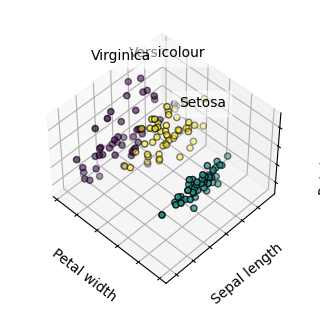

In [53]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

np.random.seed(5)


iris = datasets.load_iris()
X = iris.data
y = iris.target
pca = LDA(n_components=3)
pca.fit(X, y)
X = pca.transform(X)

fig = plt.figure(1, figsize=(4, 3))
ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:    
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean(),
        X[y == label, 2].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, 
        edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
# ax.set_title("Ground Truth")
ax.dist = 12

plt.show()

### Exercise 2 Recognize handwritten numbers with LDA (50 points ). 

Your task in this section is to recognize handwritten numbers, and you can use the linear discriminant analysis model from the Scikit-Learn library to fit, evaluate, and predict them.

<font color='red' size=4>Note that your accuracy in this section will directly determine your score.</font>

### Loading the MNIST Dataset


In [54]:
########### Write Your Code Here ###########
# datasets load minist
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

import torchvision.datasets as datasets
import torch.utils.data as data

train_dataset = datasets.MNIST('./data', train=True, download=True)
test_dataset = datasets.MNIST('./data', train=False, download=True)

X = train_dataset.data.numpy()
y = train_dataset.targets.numpy()
X_test = test_dataset.data.numpy()
y_test = test_dataset.targets.numpy()

############################################

###  Visualization of MINIST

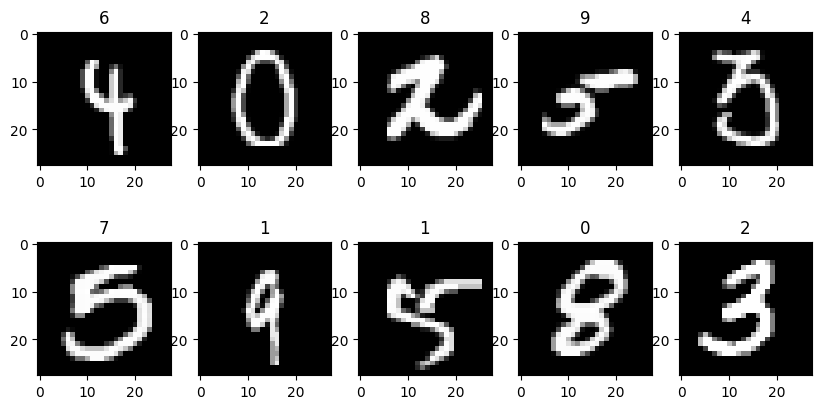

In [59]:
# Visualize MINIST
########### Write Your Code Here ###########
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import random
fig, ax = plt.subplots(2, 5, figsize=(10, 5))
for i in range(2):
    for j in range(5):
        ax[i, j].imshow(X[random.randint(0, len(X))].reshape(28, 28), cmap=cm.gray)
        # imshow means image show
        # cmap=cm.gray means gray color
        ax[i, j].set_title(y[random.randint(0, len(y))])
plt.show()
############################################

### Fit  Model

In [56]:
########### Write Your Code Here ###########
# X = X / 255.0
X = X.reshape(-1, 28*28)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7.0, random_state=0)
print(X_train.shape, y_train.shape)
scaler = StandardScaler()
# X_train = X_train.reshape(-1, 28*28)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# LDA
lda = LDA(n_components=9)
lda.fit(X_train, y_train)

############################################

(51428, 784) (51428,)


## Evaluate model

In [57]:
########### Write Your Code Here ###########
X_train = lda.transform(X_train)
X_test = lda.transform(X_test)
# Logistic Regression
clf = LogisticRegression(solver='saga', multi_class='multinomial').fit(X_train, y_train)
print("Accuracy: %.2f %%" %(clf.score(X_test, y_test)*100))
############################################


Accuracy: 88.57 %


### Exercise 3: Qustions
- Q1:What are the advantages and disadvantages of LDA?

The advantages are 
LDA is quick and efficient. Perform well even linear separable.
robust to outliers. 

The disadvantages are it assumption is groups have equal covariance, variables are normality distributed. This is a limit.


- Q2 LDA can be used for dimensionality reduction, so can PCA. Please tell the difference between them?

PCA does not consider class labels in the process of finding new feature spaces.

The goal of PCA is to find the directions(principal components) that maximize the variance in a dataset.

Used often in the large dataset and reduce dimensionality.

LDA uses labels, goal os final the feature space that maximizes class separability.

Used ofthen in pattern recongnition and ML to find linear combination of features.